# Example Jupyter Notebook for solving a system of ODEs in Python

Define a function called

```
solveODEs(numerators,t)
```

that defines a system of ordinary differential equations (ODEs) and all explicit equations and parameters
involved in the model equations. Solve the equations numerically and return one plot of the solution.

## Example system of ODEs
$$ \frac{dA}{dt} =aA$$
$$ \frac{dB}{dt} =bB-aA$$
$$\frac{dC}{dt} = cC-aA $$
$$\frac{dD}{dt} = -dD+g$$

with initial conditions
$ A(0) = 100$, $B(0) = 0$, $C(0) = 0$, $D(0) = 200$ and parameters:
$a = 1$, $b = 1$, $c = 2$, $d = 5$, and explicit equation $g = 5t$

In [12]:
def solveODEs(numerators,t):

    '''
    Description of Input and output variables:
    # numerators    : dependent variables in the numerators of the differential equations
    # t             : time
    # numerators0   : intial values of the numerators at t = 0 
    '''
    # define the system of ODEs  
    # Unpack molar flowrates and temperaturevector into descriptive variable names
    A = numerators[0]
    B = numerators[1]
    C = numerators[2]
    D  = numerators[3]
        
    # All parameters
    a = 1
    b = 1
    c = 2
    d = 5
    g = 5*t # this is g(t)
        
    # Define the derivatives
    # Population or mass balances 
    dAdt = a*A
    dBdt = b*B-a*A
    dCdt = c*C-a*A
    dDdt = -d*D+g
     
    return dAdt, dBdt, dCdt, dDdt   

Import Python libraries needed to run the code

In [10]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Set up conditions for solving the system of ODEs

In [ ]:
# Setup initital conditions for the ODE solver
A0 = 100
B0 = 0  
C0 = 0  
D0  = 200
numerators0 = A0, B0, C0, D0

# Defining t range and intervals 
t0 = 0
tf = 1
trange = np.linspace(t0, tf, num=100)

# Call odeint to solve ODEs
soln=odeint(solveODEs, numerators0, trange, args = ())

#Output vectors of numerators for each value of the denominator in the Vrange
A = soln[:,0]
B = soln[:,1] 
C = soln[:,2]
D  = soln[:,3]

Plot the results of species vs. t

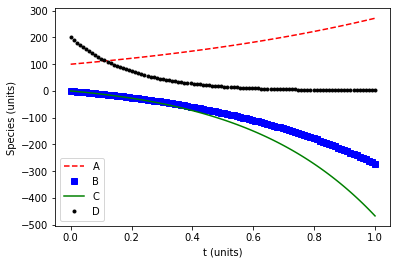

In [11]:
plt.figure(1)
plt.plot(trange,A,'r--',label='A')
plt.plot(trange,B,'bs',label='B')
plt.plot(trange,C,'g',label='C')
plt.plot(trange,D,'k.',label='D')
plt.legend()
plt.xlabel('t (units)')
plt.ylabel('Species (units)')
plt.show()